gstiff
[[  466.66666667   700.          -466.66666667   700.
      0.             0.             0.             0.        ]
 [  700.          1400.          -700.           700.
      0.             0.             0.             0.        ]
 [ -466.66666667  -700.           663.54166667  -306.25
   -196.875        393.75           0.             0.        ]
 [  700.           700.          -306.25        2450.
   -393.75         525.             0.             0.        ]
 [    0.             0.          -196.875       -393.75
   1771.875       1181.25       -1575.          1575.        ]
 [    0.             0.           393.75         525.
   1181.25        3150.         -1575.          1050.        ]
 [    0.             0.             0.             0.
  -1575.         -1575.          1575.         -1575.        ]
 [    0.             0.             0.             0.
   1575.          1050.         -1575.          2100.        ]]
free displacements is [[ 0.0027053 ]
 [-0.00541061]


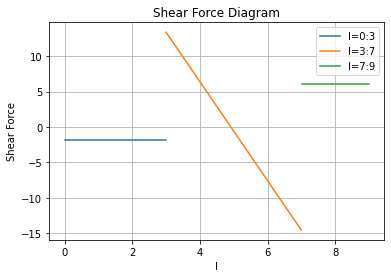

Bending moment in 1st element is -1.8937130434782612*x 
Bending moment in 2nd element is -1.8937130434782612*x+15.285019565217391*(x-3)-7*(x-3)^2 
Bending moment in 2nd element is -1.8937130434782612*x+15.285019565217391*(x-3)-7*(x-3)^2 
BMD


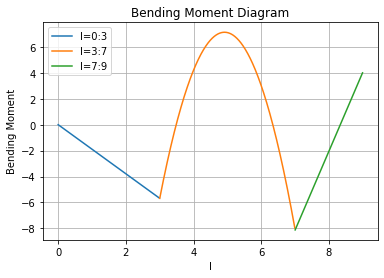

In [1]:
import numpy as np
import math as mt
ndcon= np.array([[1,2],[2,3],[3,4]])
nelem = len(ndcon)
ndofn=2
nnode=2
x=[0,3,7,9]
E=2.1e8
I=5e-6
L=3
nodes=len(x)
tdofs=nodes*ndofn
gstiff = np.zeros([tdofs,tdofs])
ielem=0
while ielem < nelem: 
    gbdof=[]
    x1 =x[ndcon[ielem][0]-1]
    x2 =x[ndcon[ielem][1]-1]
    L=mt.sqrt((x2-x1)**2)
    K1 =np.matrix('%s, %s , %s, %s; %s, %s, %s, %s; %s, %s, %s, %s; %s, %s, %s, %s' % (12*E*I/L**3, 6*E*I/L**2,-12*E*I/L**3,6*E*I/L**2,6*E*I/L**2,4*E*I/L,-6*E*I/L**2,2*E*I/L,-12*E*I/L**3,-6*E*I/L**2,12*E*I/L**3,-6*E*I/L**2,6*E*I/L**2,2*E*I/L,-6*E*I/L**2,4*E*I/L))
    inode =0
    while inode < nnode:
        idofn=1
        while idofn <= ndofn:
            gbdof.append((ndcon[ielem,inode]-1)*ndofn+idofn)
            idofn += 1
        inode += 1
    i = 0
    if i == 0:
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1] + K1[0,0]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[0,1]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[0,2]
        gstiff[gbdof[i]-1,gbdof[i+3]-1]=gstiff[gbdof[i]-1,gbdof[i+3]-1] + K1[0,3]
    i = 1
    if i == 1:
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[1,0]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[1,1]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[1,2]
        gstiff[gbdof[i]-1,gbdof[i+2]-1]=gstiff[gbdof[i]-1,gbdof[i+2]-1] + K1[1,3]
    i = 2
    if i == 2:
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[2,0]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[2,1]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[2,2]
        gstiff[gbdof[i]-1,gbdof[i+1]-1]=gstiff[gbdof[i]-1,gbdof[i+1]-1] + K1[2,3]
    i = 3 
    if i == 3:
        gstiff[gbdof[i]-1,gbdof[i-3]-1]=gstiff[gbdof[i]-1,gbdof[i-3]-1] + K1[3,0]
        gstiff[gbdof[i]-1,gbdof[i-2]-1]=gstiff[gbdof[i]-1,gbdof[i-2]-1] + K1[3,1]
        gstiff[gbdof[i]-1,gbdof[i-1]-1]=gstiff[gbdof[i]-1,gbdof[i-1]-1] + K1[3,2]
        gstiff[gbdof[i]-1,gbdof[i]-1]=gstiff[gbdof[i]-1,gbdof[i]-1]     + K1[3,3]
    ielem += 1
print("gstiff")    
print(gstiff)
b=np.delete(gstiff,[0,2,4,6,7],0)
c=np.delete(b,[0,2,4,6,7],1)
#print(c)
f=np.matrix('0;-9.3333;9.3333')
u = np.linalg.inv(c).dot(f)
print("free displacements is %s" %u)
U=np.zeros([tdofs,1])
U[1][0]=u[0][0]
U[3][0]=u[1][0]
U[5][0]=u[2][0]
print("All displacements is %s" %U)
f= gstiff[0].dot(U)
print("reactions at 1st node")
print(f)
f1= 14+gstiff[2].dot(U)
print("reactions at 2nd node")
print(f1)
f2= 14+gstiff[4].dot(U)
print("reactions at 3nd node")
print(f2)
f3= gstiff[6:8].dot(U)
print("reactions at 4th node")
print(f3)
#sfd for element
import matplotlib.pyplot as plt
w= np.arange(0,3,0.01)
x=f[0]+(0*w)
print("Shear force in 1st element is %s "%(f[0]))
y= np.arange(3,7,0.01)
z=f[0]+f1[0]-(7*(y-3))
print("Shear force in 2nd element is %s+%s-7*(x-3) "%(f[0],f1[0]))
y1= np.arange(7,9,0.01)
z1=f[0]+f1[0]+f2[0]-(7*4)+(0*y1)
print("Shear force in 3rd element is %s+%s+%s-28 "%(f[0],f1[0],f2[0]))
print("SFD")
plt.plot(w,x,y,z,y1,z1)
plt.legend(['l=0:3', 'l=3:7','l=7:9'])
plt.xlabel('l')
plt.ylabel('Shear Force')
plt.title('Shear Force Diagram')
plt.grid(True)
plt.savefig('SFD_A2_Q2.png')
plt.show()

#Bmd for element
w= np.arange(0,3,0.01)
x=(f[0]*w)
print("Bending moment in 1st element is %s*x "%(f[0]))
y= np.arange(3,7,0.01)
z=(f[0]*y)+f1[0]*(y-3)-(3.5*(y-3)**2)
print("Bending moment in 2nd element is %s*x+%s*(x-3)-7*(x-3)^2 "%(f[0],f1[0]))
y1= np.arange(7,9,0.01)
z1=(f[0]*y1)+f1[0]*(y1-3)+f2[0]*(y1-7)-(7*4*(y1-5))
print("Bending moment in 2nd element is %s*x+%s*(x-3)-7*(x-3)^2 "%(f[0],f1[0]))
print("BMD")
plt.plot(w,x,y,z,y1,z1)
plt.legend(['l=0:3', 'l=3:7','l=7:9'])
plt.xlabel('l')
plt.ylabel('Bending Moment')
plt.title('Bending Moment Diagram')
plt.grid(True)
plt.savefig('BMD_A2_Q2.png')
plt.show()


